#Task 1:
This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Column description:
1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
4.  `LunchType`: School lunch type (standard or free/reduced)
5.  `TestPrep`: Test preparation course followed (completed or none)
6.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
8.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
9.  `NrSiblings`: Number of siblings the student has (0 to 7)
10. `TransportMeans`: Means of transport to school (schoolbus/private)
11. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
12. `MathScore`: math test score(0-100)
13. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

#Download the dataset
Run the cell below

In [192]:
!gdown 1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2

Downloading...
From: https://drive.google.com/uc?id=1La5PlbYWPH1VyiE8Zq2BDAYWqtpd56Z2
To: /content/Expanded_data_with_more_features.csv
100% 2.91M/2.91M [00:00<00:00, 165MB/s]


In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read the dataset

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [195]:
df=pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [196]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [197]:
missing_values=df.isnull().sum()

In [198]:
percent_missing=missing_values/len(df)*100

In [199]:
percent_missing

Unnamed: 0              0.000000
Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [200]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [201]:
columns_with_missing_values=df.columns[df.isnull().any()]
print(f'Number of columns with missing values: {len(columns_with_missing_values)}')

Number of columns with missing values: 9


In [202]:
non_null_values=df['TestPrep'].dropna().unique()
non_null_values

array(['none', 'completed'], dtype=object)

#Visualization

In [203]:
master_degree=df[df['ParentEduc']=="master's degree"]
highschool_degree=df[df['ParentEduc']=="high school"]

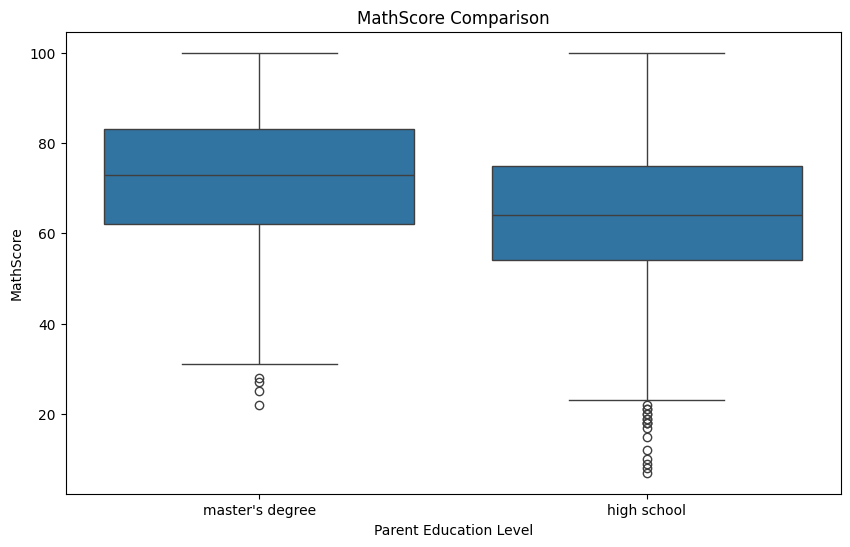

In [204]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ParentEduc',y='MathScore',data=pd.concat([master_degree,highschool_degree]))
plt.title('MathScore Comparison')
plt.xlabel('Parent Education Level')
plt.ylabel('MathScore')
plt.show()

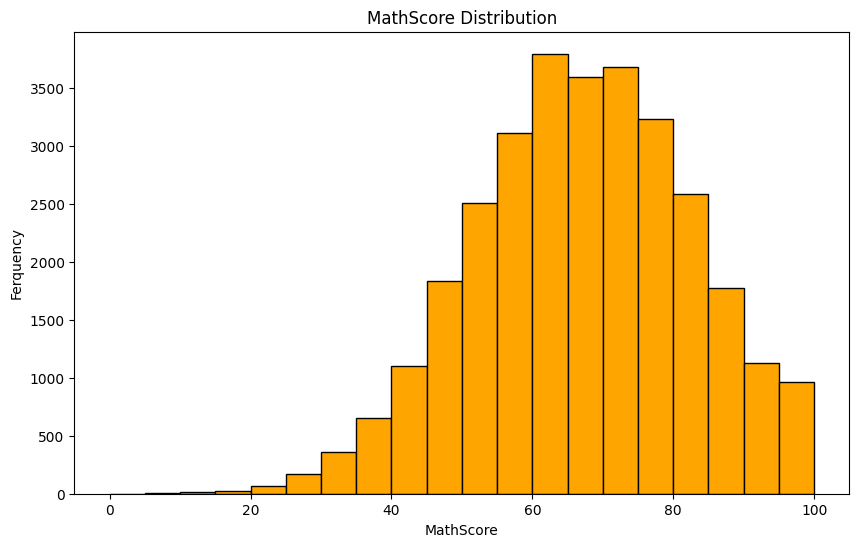

In [205]:
plt.figure(figsize=(10,6))
plt.hist(df['MathScore'], bins=20, color='orange', edgecolor='black')
plt.title('MathScore Distribution')
plt.xlabel('MathScore')
plt.ylabel('Ferquency')
plt.show()

#Missing Values & Textual data

In [206]:
missing_values

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [207]:
percent_missing

Unnamed: 0              0.000000
Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

<Axes: >

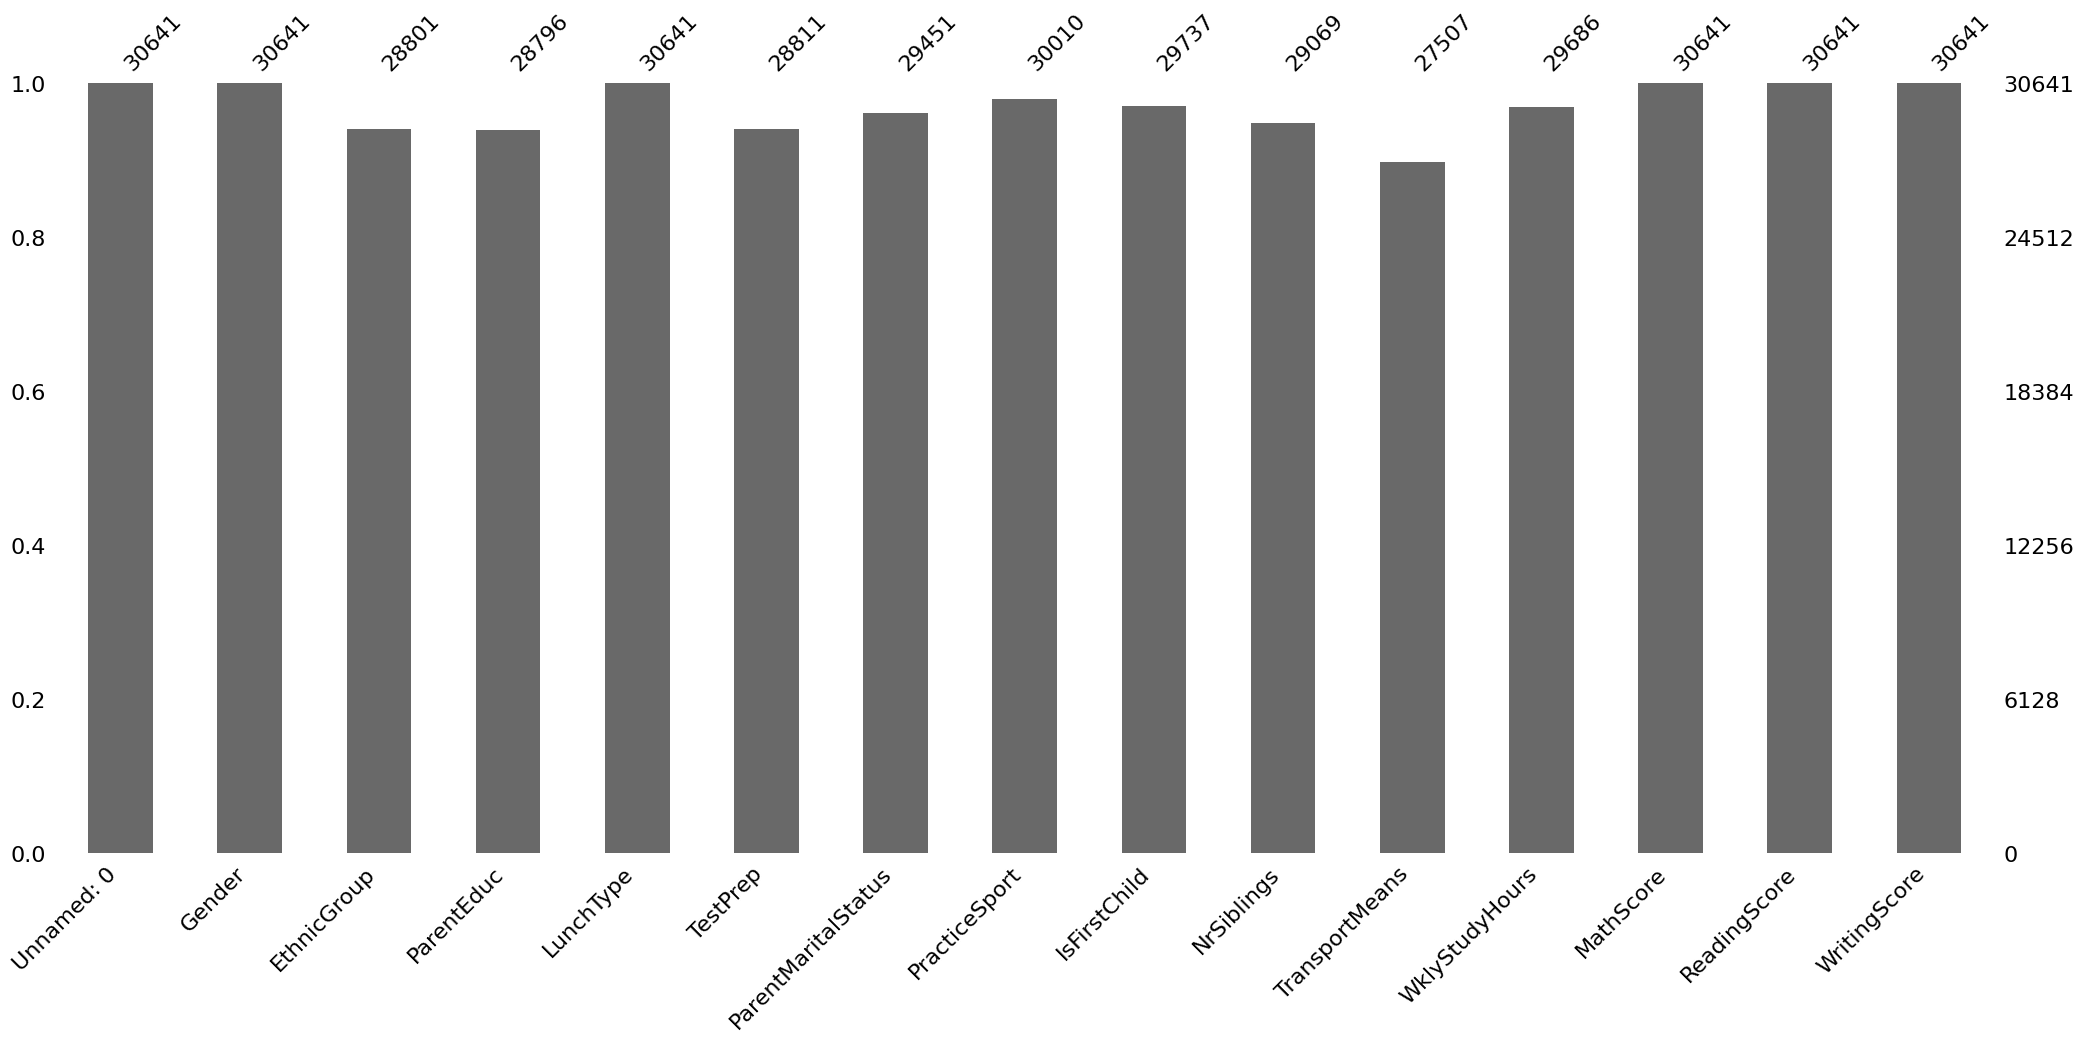

In [208]:
msno.bar(df)

<Axes: >

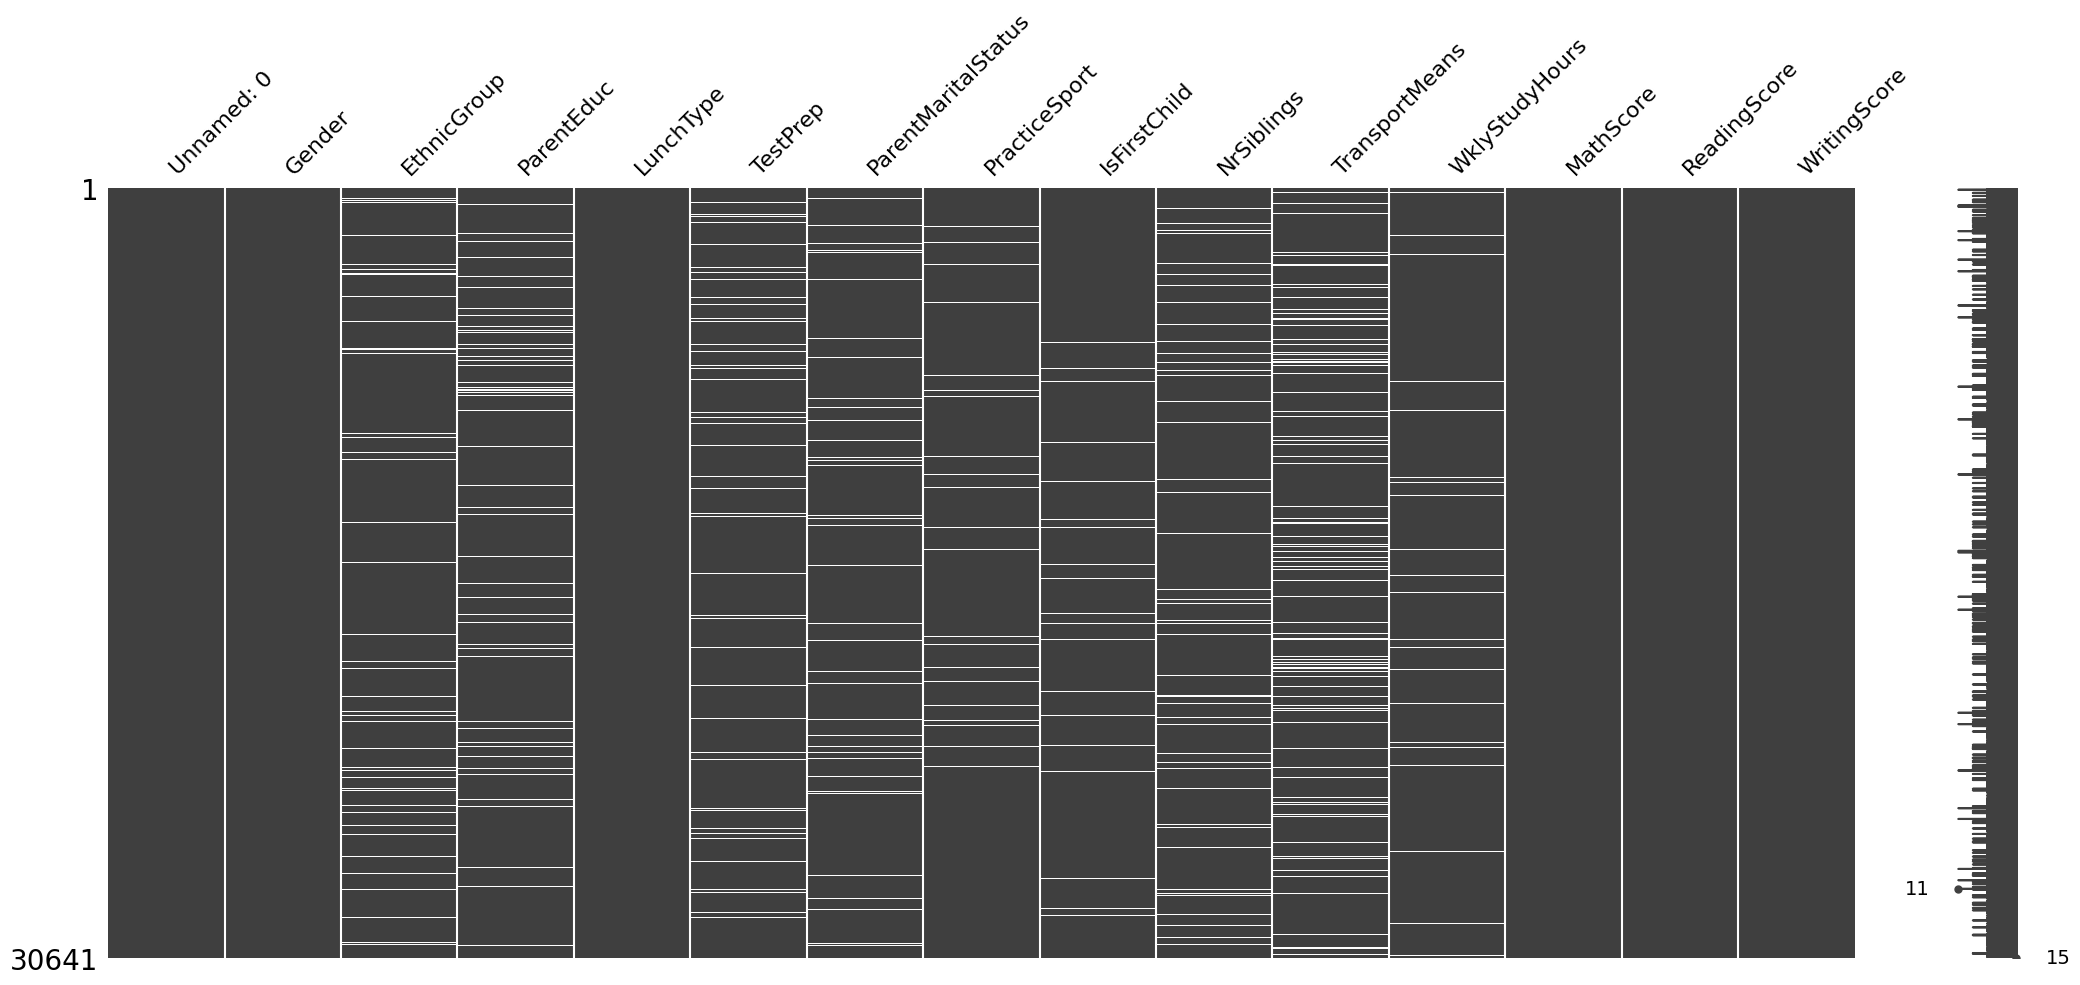

In [209]:
msno.matrix(df)

In [210]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['target'] = label_encoder.fit_transform(df['EthnicGroup'])
df['ParentEduc'] = label_encoder.fit_transform(df['ParentEduc'])
df['ParentMaritalStatus'] = label_encoder.fit_transform(df['ParentMaritalStatus'])
df['PracticeSport'] = label_encoder.fit_transform(df['PracticeSport'])
df['IsFirstChild'] = label_encoder.fit_transform(df['IsFirstChild'])
df['TransportMeans'] = label_encoder.fit_transform(df['TransportMeans'])

In [211]:
df['LunchType'].value_counts()

standard        19905
free/reduced    10736
Name: LunchType, dtype: int64

In [212]:
def encode_lunch(x):
  if type(x) == float:
    return x
  if "standard" in x:
    return 1
  if "free/reduced" in x:
    return 0

In [213]:
df['LunchType'] = df['LunchType'].apply(encode_lunch)

In [214]:
df['TestPrep'].value_counts()

none         18856
completed     9955
Name: TestPrep, dtype: int64

In [215]:
def encode_testPrep(x):
  if type(x) == float:
    return x
  if "completed" in x:
    return 1
  if "none" in x:
    return 0

In [216]:
df['TestPrep'] = df['TestPrep'].apply(encode_testPrep)

In [217]:
df['WklyStudyHours'].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [218]:
def enc_hrs(x):
  if type(x) == float:
    return x
  if "< 5" == x:
    return 0
  if "5 - 10" == x:
    return 1
  else:
    return 2

In [219]:
df['WklyStudyHours'] = df['WklyStudyHours'].apply(enc_hrs)

In [220]:
df = df.drop(columns=['Unnamed: 0'], axis=1)
df = df.drop(columns=['EthnicGroup'], axis=1)

In [221]:
df

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,target
0,0,1,1,0.0,1,1,1,3.0,1,0.0,71,71,74,5
1,0,4,1,NaN,1,2,1,0.0,2,1.0,69,90,88,2
2,0,3,1,0.0,2,2,1,4.0,1,0.0,87,93,91,1
3,1,0,0,0.0,1,0,0,1.0,2,1.0,45,56,42,0
4,1,4,1,0.0,1,2,1,0.0,1,1.0,76,78,75,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,2,1,0.0,2,2,0,2.0,1,1.0,59,61,65,3
30637,1,2,1,0.0,2,1,0,1.0,0,1.0,58,53,51,4
30638,0,2,0,1.0,1,2,0,1.0,0,1.0,61,70,67,5
30639,0,0,1,1.0,1,1,0,3.0,1,1.0,82,90,93,3


In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

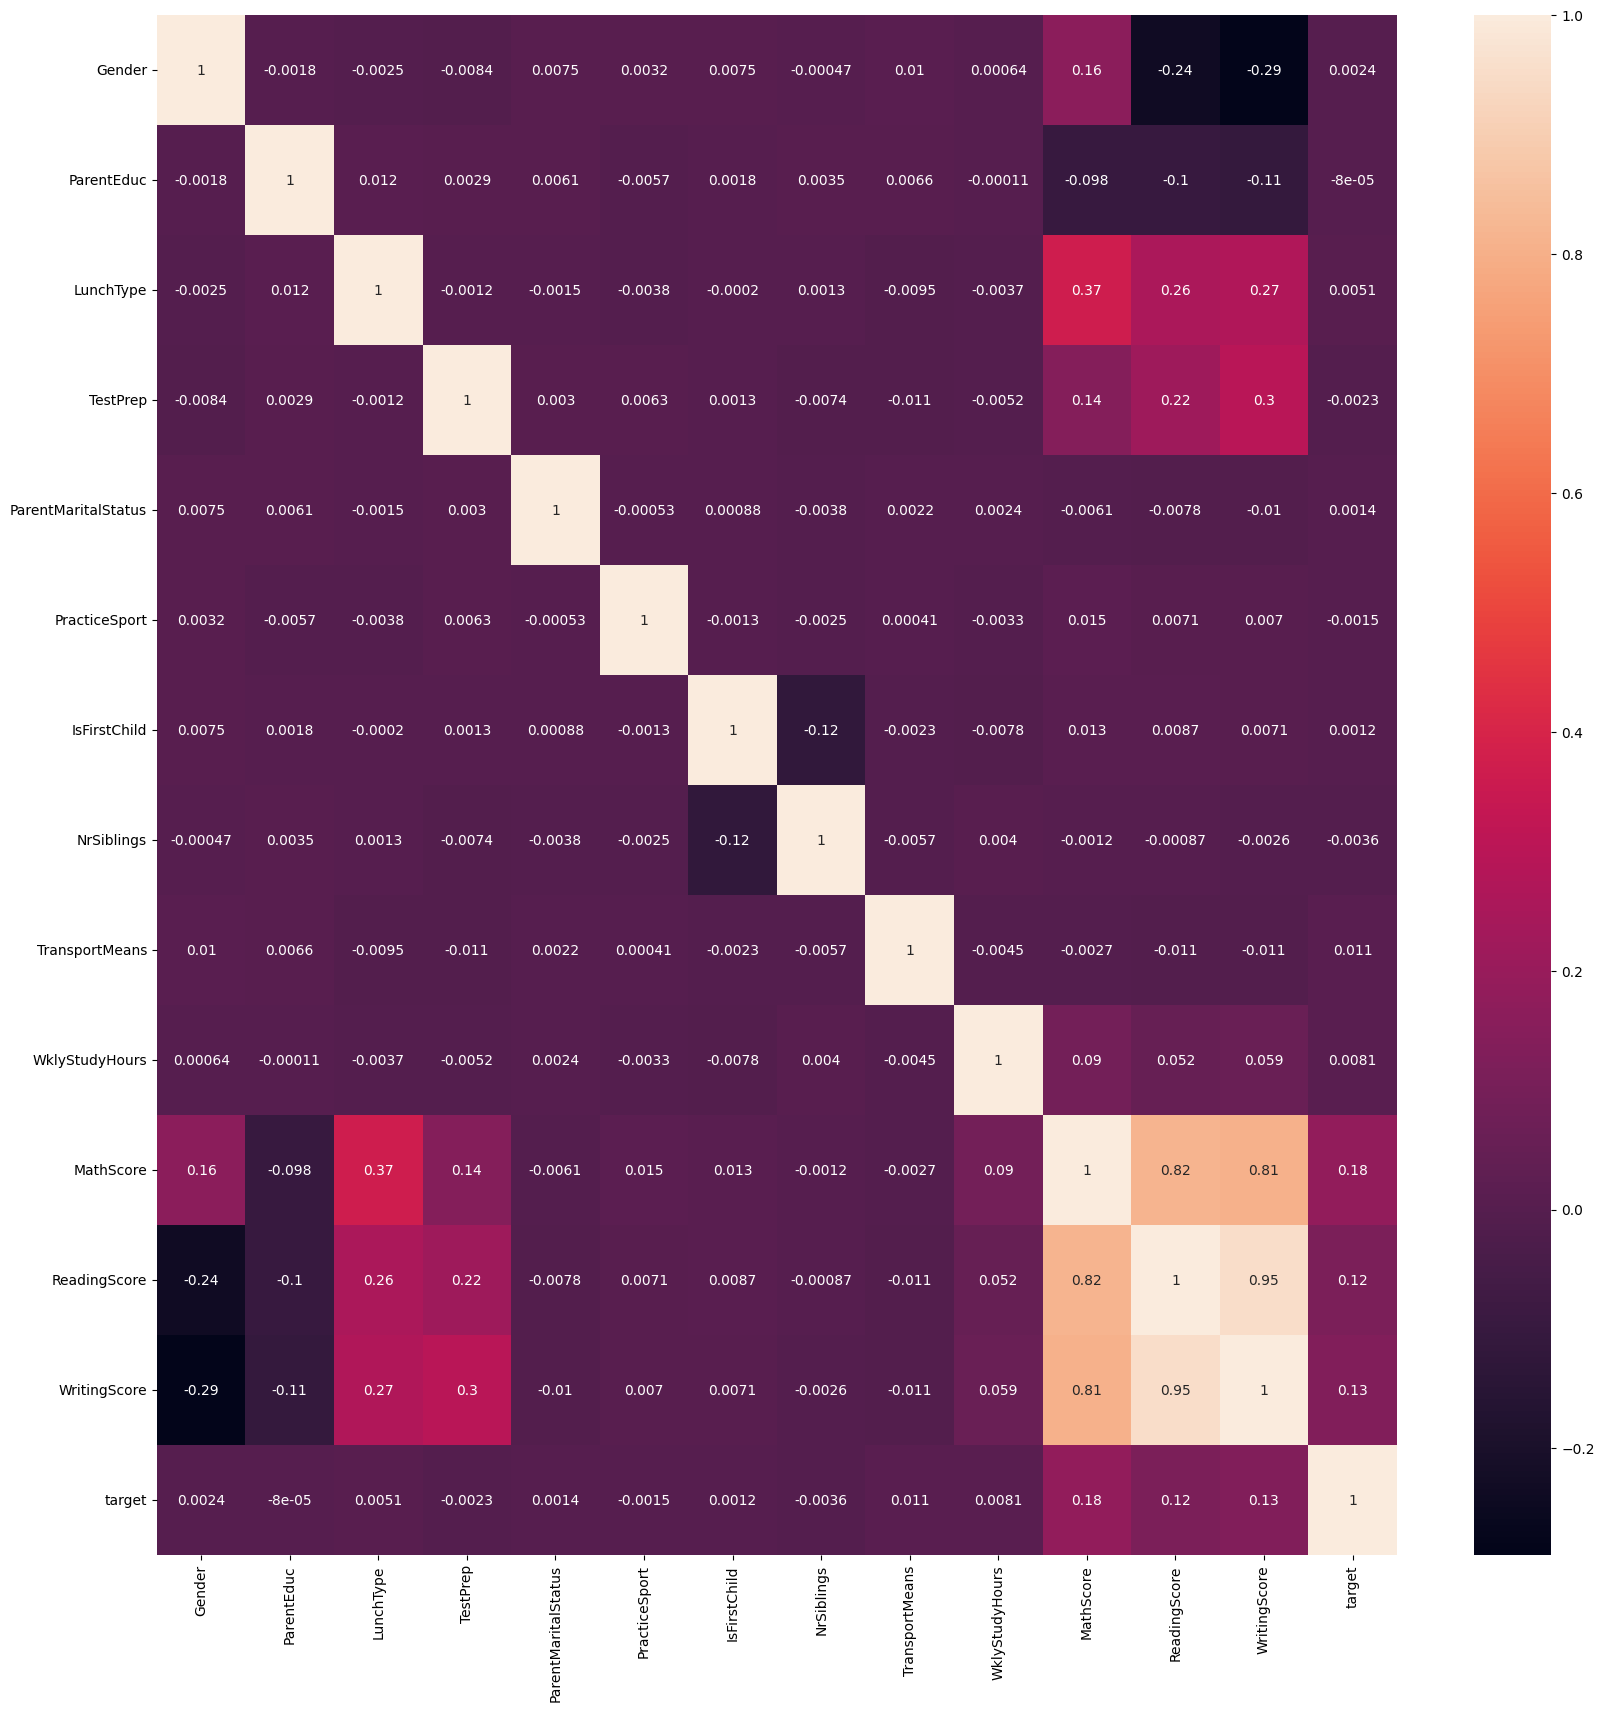

In [223]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)

In [224]:
df.isnull().sum()

Gender                    0
ParentEduc                0
LunchType                 0
TestPrep               1830
ParentMaritalStatus       0
PracticeSport             0
IsFirstChild              0
NrSiblings             1572
TransportMeans            0
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
target                    0
dtype: int64

In [225]:
df.columns

Index(['Gender', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus',
       'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore',
       'target'],
      dtype='object')

In [226]:
columns_na = ['ParentEduc', 'LunchType', 'TestPrep', 'PracticeSport',
       'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours',
       'MathScore', 'ReadingScore', 'WritingScore']

In [229]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [230]:
imputer = IterativeImputer()
df[columns_na] = imputer.fit_transform(df[columns_na])

In [231]:
df.isnull().sum()

Gender                 0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
target                 0
dtype: int64

#Train - test split of the dataset (80:20 ratio)

In [233]:
from sklearn.model_selection import train_test_split
X, Y = df.drop(columns=['target']), df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Model training (Use KNN, Logistic regression or Linear regression)

In [234]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [235]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [236]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=11)

In [237]:
preds = model.predict(X_test)
preds

array([3, 2, 2, ..., 3, 1, 2])

#Model evaluation

In [238]:
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       0.06      0.02      0.04       442
           1       0.20      0.23      0.21      1180
           2       0.31      0.47      0.37      1872
           3       0.24      0.23      0.23      1460
           4       0.20      0.07      0.11       784
           5       0.11      0.01      0.01       391

    accuracy                           0.25      6129
   macro avg       0.19      0.17      0.16      6129
weighted avg       0.23      0.25      0.23      6129



In [239]:
from xgboost import XGBClassifier
clf = XGBClassifier(
    n_estimators=100,
    max_depth = 5
)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       442
           1       0.24      0.08      0.12      1180
           2       0.33      0.59      0.43      1872
           3       0.35      0.41      0.38      1460
           4       0.39      0.36      0.37       784
           5       0.00      0.00      0.00       391

    accuracy                           0.34      6129
   macro avg       0.22      0.24      0.22      6129
weighted avg       0.28      0.34      0.29      6129

